In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
# Use this as path to input the database file "conn = sqlite3.connect('/kaggle/input/ipldatabase/database.sqlite')"

/kaggle/input/ipldatabase/database.sqlite


In [2]:
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
#path = "../input/"  #Insert path here
#database = path + 'database.sqlite'

#from subprocess import check_output

conn = sqlite3.connect('/kaggle/input/ipldatabase/database.sqlite')

In [3]:
# to check the table names in the database
tables = pd.read_sql_query("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,CREATE TABLE [Player] (\n\t[Player_Id]\tintege...
1,table,Extra_Runs,Extra_Runs,3,CREATE TABLE [Extra_Runs] (\n\t[Match_Id]\tint...
2,table,Batsman_Scored,Batsman_Scored,7,CREATE TABLE [Batsman_Scored] (\n\t[Match_Id]\...
3,table,Batting_Style,Batting_Style,10,CREATE TABLE [Batting_Style] (\n\t[Batting_Id]...
4,table,Bowling_Style,Bowling_Style,11,CREATE TABLE [Bowling_Style] (\n\t[Bowling_Id]...
5,table,Country,Country,12,CREATE TABLE [Country] (\n\t[Country_Id]\tinte...
6,table,Season,Season,14,CREATE TABLE [Season] (\n\t[Season_Id]\tintege...
7,table,City,City,15,CREATE TABLE [City] (\n\t[City_Id]\tinteger NO...
8,table,Outcome,Outcome,16,CREATE TABLE [Outcome] (\n\t[Outcome_Id]\tinte...
9,table,Win_By,Win_By,17,CREATE TABLE [Win_By] (\n\t[Win_Id]\tinteger N...


In [4]:
countries = pd.read_sql_query("""SELECT *
                        FROM Country;""", conn)
countries

,Country_Id,Country_Name
0,1,India
1,2,South Africa
2,3,U.A.E
3,4,New Zealand
4,5,Australia
5,6,Pakistan
6,7,Sri Lanka
7,8,West Indies
8,9,Zimbabwea
9,10,England


In [5]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        """, conn)
teams

,Team_Id,Team_Name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals
5,6,Delhi Daredevils
6,7,Mumbai Indians
7,8,Deccan Chargers
8,9,Kochi Tuskers Kerala
9,10,Pune Warriors


In [6]:
# Joining tables Team_id and Player_match with match to get the team performance
team_table = pd.read_sql_query ("""Select m.Match_id,Team_1,Team_2,Team_Name,Match_winner,Win_type,Toss_Decide from Match m 
                                 join Player_Match pm
                                 on pm.match_id = m.match_id
                                 join team t
                                 on t.team_id = pm.team_id""",conn)

team_table.head(20)

,Match_Id,Team_1,Team_2,Team_Name,Match_Winner,Win_Type,Toss_Decide
0,335987,2,1,Kolkata Knight Riders,1.0,1,1
1,335987,2,1,Kolkata Knight Riders,1.0,1,1
2,335987,2,1,Kolkata Knight Riders,1.0,1,1
3,335987,2,1,Kolkata Knight Riders,1.0,1,1
4,335987,2,1,Kolkata Knight Riders,1.0,1,1
5,335987,2,1,Royal Challengers Bangalore,1.0,1,1
6,335987,2,1,Royal Challengers Bangalore,1.0,1,1
7,335987,2,1,Royal Challengers Bangalore,1.0,1,1
8,335987,2,1,Royal Challengers Bangalore,1.0,1,1
9,335987,2,1,Royal Challengers Bangalore,1.0,1,1


In [7]:
# connecting table Player_Match, Player adn Rolee to ccheck the roles of players and their skills only for country =1 i.e India
role = pd.read_sql_query ("""Select pm.Role_Id,Role_Desc,p.Player_Id,Player_Name,Country_Name,Batting_hand,Bowling_skill
                            from Rolee r join Player_match pm
                            on r.Role_Id = pm.Role_Id
                            join Player p
                            on p.Player_Id = pm.Player_Id
                            where Country_Name=1
                            order by DOB desc""",conn)
role.head(20)

,Role_Id,Role_Desc,Player_Id,Player_Name,Country_Name,Batting_hand,Bowling_skill
0,3,Player,410,Ishan Kishan,1,1,NaN
1,3,Player,410,Ishan Kishan,1,1,NaN
2,3,Player,410,Ishan Kishan,1,1,NaN
3,3,Player,410,Ishan Kishan,1,1,NaN
4,3,Player,410,Ishan Kishan,1,1,NaN
5,3,Player,402,SN Khan,1,2,10.0
6,3,Player,402,SN Khan,1,2,10.0
7,3,Player,402,SN Khan,1,2,10.0
8,3,Player,402,SN Khan,1,2,10.0
9,3,Player,402,SN Khan,1,2,10.0


In [8]:
seasons = pd.read_sql_query("""Select * from Season order by Season_Year"""
                
                            ,conn)

seasons

,Season_Id,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,1,32,100,102,2008
1,2,53,18,61,2009
2,3,133,133,131,2010
3,4,162,162,194,2011
4,5,315,162,190,2012
5,6,32,19,71,2013
6,7,305,46,364,2014
7,8,334,187,71,2015
8,9,8,8,299,2016


In [9]:
ball_by_ball = pd.read_sql_query("""Select bs.Match_Id,Runs_Scored,Team_batting,Team_Bowling 
                                from Ball_by_Ball bb join Batsman_Scored bs
                                on bs.Match_Id = bb.Match_Id""",conn)

ball_by_ball.head()

,Match_Id,Runs_Scored,Team_Batting,Team_Bowling
0,335987,0,1,2
1,335987,0,2,1
2,335987,0,1,2
3,335987,0,2,1
4,335987,0,1,2


In [10]:
## Using Group By and having
venue_city = pd.read_sql_query("""Select Venue_Id, Country_Name, count(City_Name) as 'Number of Cities'
                                from Venue v join City ct on ct.City_Id = v.City_Id
                                join Country cy
                                on cy.Country_Id= ct.Country_Id
                                group by Country_Name
                                having Country_Name= "India" or Country_Name='U.A.E'
                                """,conn)

venue_city

,Venue_Id,Country_Name,Number of Cities
0,1,India,24
1,29,U.A.E,3


In [11]:
metric = pd.read_sql_query("""SELECT 'Matches' As Dimension , COUNT(*) As 'Measure'
                            FROM Match
                   UNION ALL
                   
                   SELECT 'Extra_Runs' As Dimension , SUM(Extra_Runs.Extra_Runs) As 'Measure'
                   FROM Extra_Runs
                   UNION ALL
                   
                   SELECT 'Batsman_runs' As Dimension , SUM(B.Runs_Scored) As 'Value'
                   FROM Batsman_Scored B
                   UNION ALL
                   
                   SELECT 'Wickets' As Dimension , COUNT(*) As 'Measure'
                   FROM Wicket_Taken
                   UNION ALL

                    SELECT 'Sixes' As Dimension , COUNT(*) As 'Measure'
                    FROM Batsman_Scored
                    WHERE Batsman_Scored.Runs_Scored = 6
                    UNION ALL
                    SELECT 'Fours' As Dimension , COUNT(*) As 'Measure'
                    FROM Batsman_Scored
                    WHERE Batsman_Scored.Runs_Scored = 4
                    UNION ALL
                    SELECT 'Singles' As Dimension , COUNT(*) As 'Measure'
                    FROM Batsman_Scored
                    WHERE Batsman_Scored.Runs_Scored = 1""",conn
       )
metric

,Dimension,Measure
0,Matches,577
1,Extra_Runs,9514
2,Batsman_runs,165961
3,Wickets,6727
4,Sixes,5814
5,Fours,15414
6,Singles,50108


In [12]:
captain = pd.read_sql( """SELECT C.Player_Name , COUNT(*) As 'Matches_captained'
                        FROM Player_Match A  JOIN Rolee B
                        ON A.Role_Id = B.Role_Id
                        JOIN Player C
                        ON A.Player_Id = C.Player_Id
                        WHERE A.Role_Id = 4 
                        GROUP BY C.Player_Name
                        ORDER BY Matches_captained DESC;""",conn)


captain

,Player_Name,Matches_captained
0,MS Dhoni,136
1,AC Gilchrist,74
2,KC Sangakkara,27
3,KD Karthik,7
4,BB McCullum,4
5,PA Patel,1


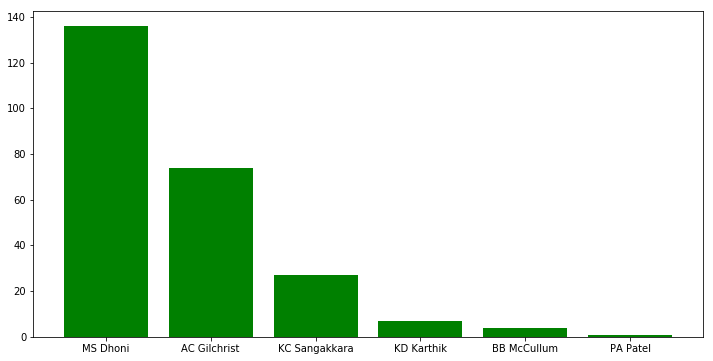

In [13]:
#labels = captain["Player_Name"]
plt.figure(figsize=(12,6))
y = captain["Matches_captained"]

x = captain['Player_Name']
plt.bar(x,y,align='center',color='g')

plt.show()